In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import os

In [3]:
os.listdir()  

['.ipynb_checkpoints', 'movies.csv', 'przemysl-filmowy.ipynb', 'README.md']

In [4]:
plik = 'movies.csv'
data = pd.read_csv(plik, encoding='cp1252')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


In [5]:
data.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


# Braki danych

In [6]:
braki_danych = pd.concat([data.isnull().sum()], axis = 1, keys = ["Brakujące dane:"])
print(braki_danych)

          Brakujące dane:
budget                  0
company                 0
country                 0
director                0
genre                   0
gross                   0
name                    0
rating                  0
released                0
runtime                 0
score                   0
star                    0
votes                   0
writer                  0
year                    0


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,6820.0,2.458113e+07,3.702254e+07,0.0,0.00,11000000.0,32000000.00,300000000.0
gross,6820.0,3.349783e+07,5.819760e+07,70.0,1515839.00,12135679.0,40065340.50,936662225.0
runtime,6820.0,1.065513e+02,1.802818e+01,50.0,95.00,102.0,115.00,366.0
score,6820.0,6.374897e+00,1.003142e+00,1.5,5.80,6.4,7.10,9.3
votes,6820.0,7.121952e+04,1.305176e+05,27.0,7665.25,25892.5,75812.25,1861666.0
year,6820.0,2.001000e+03,8.944501e+00,1986.0,1993.00,2001.0,2009.00,2016.0


In [8]:
for i in ['budget', 'gross', 'runtime', 'score', 'votes', 'year']:
    print(i, 'min =', data[i].min(), '&', i, 'max =', data[i].max())

budget min = 0.0 & budget max = 300000000.0
gross min = 70.0 & gross max = 936662225.0
runtime min = 50 & runtime max = 366
score min = 1.5 & score max = 9.3
votes min = 27 & votes max = 1861666
year min = 1986 & year max = 2016


In [9]:
len(data[data['budget']==0])

2182

W danym zbiorze danych nie ma braków. Braki danych w "budget" zostały zastąpione zerami. 

In [10]:
# budget, gross, runtime, 
# rating, genre, coutry, year

# Zmienna rating

In [16]:
data["rating"].value_counts()

R          3392
PG-13      1995
PG          951
UNRATED     308
G           147
NC-17        22
TV-14         1
TV-PG         1
B             1
B15           1
TV-MA         1
Name: rating, dtype: int64

In [15]:
data["rating"] = pd.DataFrame(data["rating"].replace(
{'NOT RATED':'UNRATED'}))

# Zmienna genre

In [24]:
data["genre"].value_counts()

Comedy       2080
Drama        1444
Action       1331
Crime         522
Adventure     392
Biography     359
Horror        277
Animation     277
Mystery        38
Fantasy        32
Thriller       18
Romance        15
Family         14
Sci-Fi         13
Musical         4
Western         2
War             2
Name: genre, dtype: int64

# Zmienna country

In [34]:
data["country"].value_counts()

USA                               4872
UK                                 698
France                             283
Canada                             150
Germany                            138
Australia                           82
Japan                               68
China                               63
Spain                               56
Italy                               51
Ireland                             44
India                               39
Denmark                             33
South Korea                         20
Belgium                             18
New Zealand                         18
Sweden                              18
Mexico                              15
Argentina                           13
Iran                                12
Netherlands                         12
Russia                              11
South Africa                         9
Taiwan                               8
Norway                               8
Czech Republic           

In [33]:
data["country"] = pd.DataFrame(data["country"].replace(
{'West Germany':'Germany', 'Hong Kong' : 'China', 'Soviet Union':'Russia'}))

5 krajów z największą ilością filmów w danym zbiorze

USA        4872
UK          698
Francja     283
Kanada      150
Niemcy      134
Name: 5 krajów z największą ilością filmów, dtype: int64

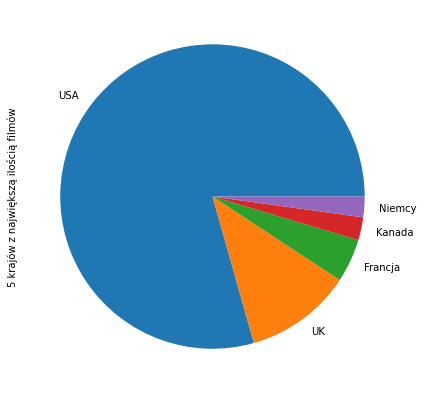

In [41]:
wykres_kolowy = pd.Series([len(country1), len(country2), len(country3), len(country4), len(country5)], name = "5 krajów z największą ilością filmów", index = ["USA","UK","Francja","Kanada", "Niemcy"])

wykres_kolowy.plot.pie(figsize=(10, 7))
wykres_kolowy

# Zmienna year

In [55]:
data["year"].value_counts()

1989    221
2015    220
2013    220
1992    220
1996    220
2000    220
2004    220
2008    220
2012    220
2016    220
1993    220
1997    220
2001    220
2005    220
2009    220
1986    220
2011    220
1990    220
1994    220
1998    220
2002    220
2006    220
2010    220
2014    220
1991    220
1995    220
1999    220
2003    220
2007    220
1988    220
1987    219
Name: year, dtype: int64

array([1986., 1992., 1998., 2004., 2010., 2016.])